<a href="https://colab.research.google.com/github/Ahmadsad/ID2211-Project/blob/master/TemplateAhmadWeightMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib
!pip install SimpleITK
import matplotlib.pyplot as plt
import helpers as h
import numpy as np

In [5]:
scaling_factor = 16
image_file_name = "IMG-0002-00074.dcm"
gt_file_name = "liver_GT_074.png"
image = get_image(image_file_name, scaling_factor=scaling_factor)
gt_image = h.get_ground_truth_image(gt_file_name, scaling_factor=scaling_factor)


In [50]:
# Get simi matrices No spatial, the list of graphs are sorted as same order as images below
# [row_image, normalized_image, thresholded_rowImage, amplified_rowImage, threshed_amplified_rowImage]
similarity_matrices_noSpatial = []

similarity_matrices_noSpatial.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=False, apply_threshold=False, amplify_edges=False), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=False, amplify_edges=False), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=False), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=False, amplify_edges=True), use_spatial=False))
similarity_matrices_noSpatial.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=True), use_spatial=False))


In [51]:
# Get simi matrices with spatial, the list of graphs are sorted as same order as images below
# [row_image, normalized_image, thresholded_rowImage, amplified_rowImage, threshed_amplified_rowImage]
similarity_matrices = []

similarity_matrices.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=False, apply_threshold=False, amplify_edges=False), use_spatial=True))
similarity_matrices.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=False, amplify_edges=False), use_spatial=True))
similarity_matrices.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=False), use_spatial=True))
similarity_matrices.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=False, amplify_edges=True), use_spatial=True))
similarity_matrices.append(h.build_weighMatrix(get_image(image_file_name, scaling_factor=scaling_factor, normalize=True, apply_threshold=True, amplify_edges=True), use_spatial=True))


In [52]:
# sparsefy
# build segmentation masks/cluster.labeles and graphs
masks_withSpatial = []
masks_withoutSpatial = []
graphs_withSpatial = []
graphs_withoutSpatial = []
for i in range(len(similarity_matrices)):
  similarity_matrices[i] = h.sparsefy_simi_matrix(similarity_matrices[i], sparse_thresh=0.7)
  labels, _, _ = h.get_spectral_clustering(similarity_matrices[i], n_clusters=10)
  masks_withSpatial.append(h.get_cluster_image(labels, image.shape))
  graphs_withSpatial.append(h.build_graph_of_simiMatrix(similarity_matrices[i]))

  similarity_matrices_noSpatial[i] = h.sparsefy_simi_matrix(similarity_matrices_noSpatial[i], sparse_thresh=0.7)
  labels, _, _ = h.get_spectral_clustering(similarity_matrices_noSpatial[i], n_clusters=10)
  masks_withoutSpatial.append(h.get_cluster_image(labels, image.shape))
  graphs_withoutSpatial.append(h.build_graph_of_simiMatrix(similarity_matrices_noSpatial[i]))


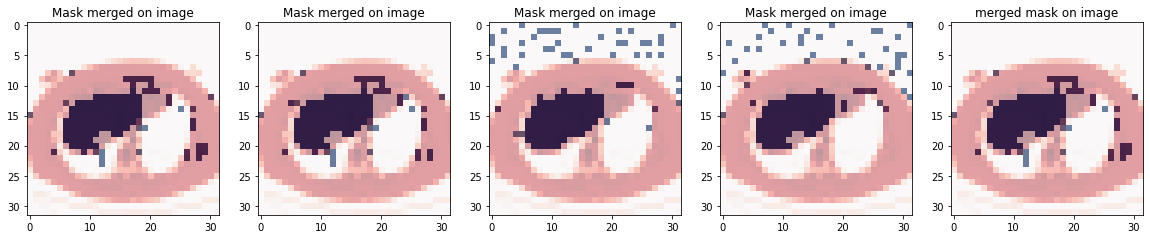

In [106]:
# with spatial information, radius 6
clusters_withSpatial = [10, 4, 5, 3, 1]
h.plot_multiple_masks(masks_withSpatial, clusters_withSpatial, image)

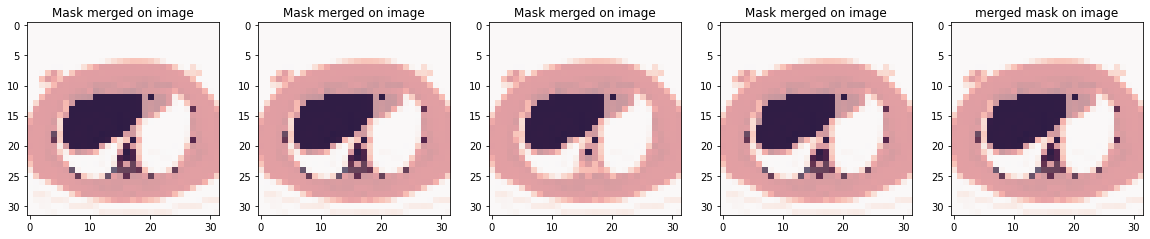

In [107]:
# without spatial information
clusters_withoutSpatial = [1, 7, 5, 4, 7]
h.plot_multiple_masks(masks_withoutSpatial, clusters_withoutSpatial, image)

In [ ]:
# almost all of below can be obtained for each graph (the most intresting graphs)
# inf = h.get_general_graph_info(graphs_withSpatial[0])
# hist = h.plt_graph_hist(graphs_withSpatial[0])

In [ ]:
# Get the average clustering coef and the normalized cut values for the cuts shown in the plot above
avgs_cc_withSpatial= []
avgs_cc_withoutSpatial = []
nc_withSpatial= []
nc_withoutSpatial = []
for i in range(len(graphs_withoutSpatial)):
  avgs_cc_withSpatial.append(h.get_avg_cluster_coef(graphs_withSpatial[i]))
  nc_withSpatial.append(h.get_normalizedCut_value(graphs_withSpatial[i], 
                                                  h.get_subgrapg(graphs_withSpatial[i], np.where(masks_withSpatial[i]==clusters_withSpatial[i]))))

  avgs_cc_withoutSpatial.append(h.get_avg_cluster_coef(graphs_withoutSpatial[i]))
  nc_withoutSpatial.append(h.get_normalizedCut_value(graphs_withoutSpatial[i], 
                                                     h.get_subgrapg(graphs_withoutSpatial[i], np.where(masks_withoutSpatial[i]==clusters_withoutSpatial[i]))))


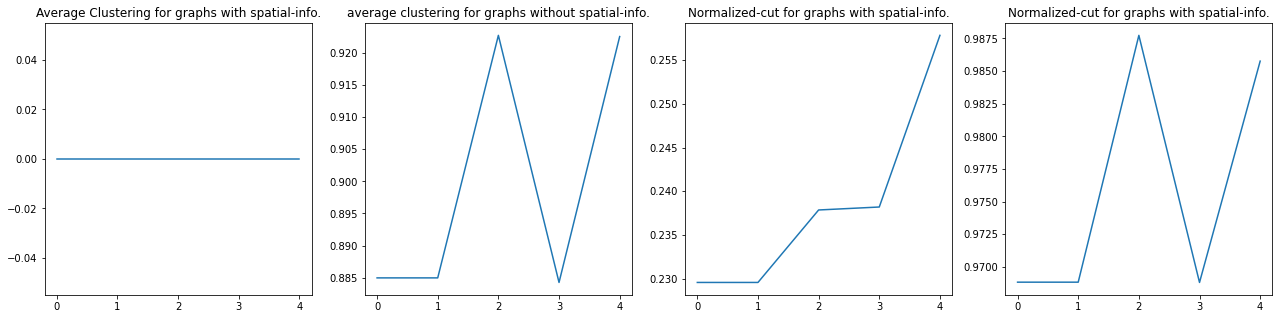

In [124]:
plt.figure(figsize=(22,5))
plt.subplot(1, 4, 1)
plt.plot(avgs_cc_withSpatial)
plt.title('Average Clustering for graphs with spatial-info.')
plt.subplot(1, 4, 2)
plt.plot(avgs_cc_withoutSpatial)
plt.title('average clustering for graphs without spatial-info.')
plt.subplot(1, 4, 3)
plt.plot(nc_withSpatial)
plt.title('Normalized-cut for graphs with spatial-info.')
plt.subplot(1, 4, 4)
plt.plot(nc_withoutSpatial)
plt.title('Normalized-cut for graphs with spatial-info.')
plt.show()

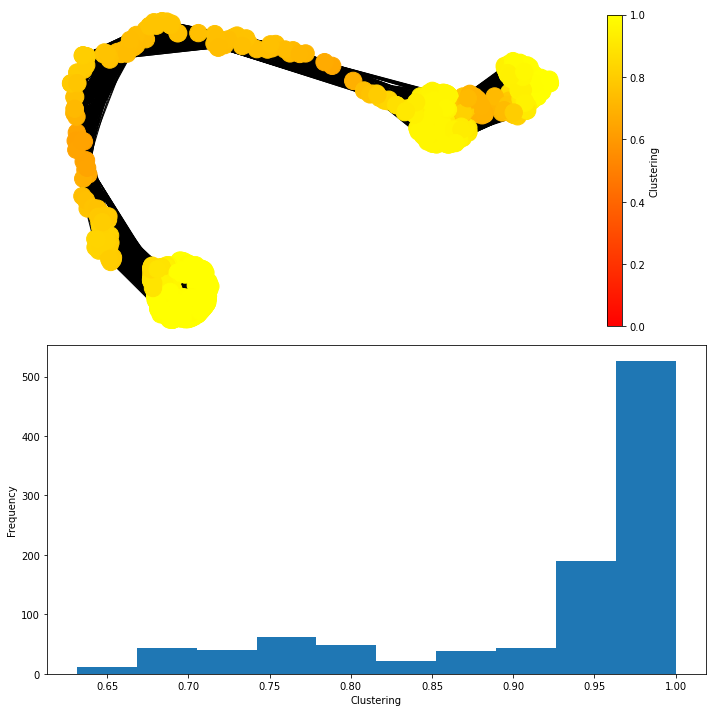

In [93]:
h.plot_cluster_distribuition(graphs_withoutSpatial[2])

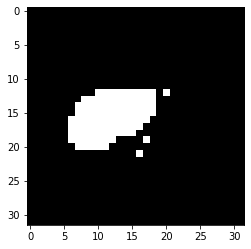

In [101]:
cluster = 3 # update this to look at a different cluster
labels, _, _ = h.get_spectral_clustering(similarity_matrices_noSpatial[2], n_clusters=10)
cluster_image = h.get_cluster_image(labels, image.shape)

plt.imshow(cluster_image==cluster, cmap="gray")
plt.show()

In [99]:
jaccard, f_score, precision, sensitivity = h.get_evaluation_scores(cluster_image, gt_image)

print("Jaccard: {:.2f}".format(jaccard))
print("Precision: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(precision[0], precision[1]))
print("Sensitivity: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(sensitivity[0], sensitivity[1]))
print("f_score: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format( f_score[0],  f_score[1]))

Jaccard: 0.13
Precision: CLASS 0: 0.0000, CLASS 1: 0.1289
Sensitivity: CLASS 0: 0.0000, CLASS 1: 1.0000
f_score: CLASS 0: 0.0000, CLASS 1: 0.2284


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hausdrof distance is:  3.605551275463989
Dice coefficient is:  0.9378531073446328


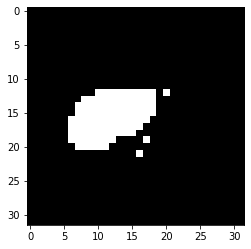

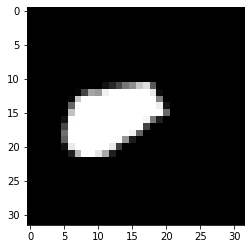

In [105]:

tmp = h.get_mask_with_specLabel(mask=cluster_image, label=cluster)
hd = h.get_hausdorff_dist(tmp, gt_image)
# I kept the Dice since it's a bit different from f.score and more populare in segmentation
dc = h.get_dice_coeff(tmp, gt_image)
print('Hausdrof distance is: ',hd)
print('Dice coefficient is: ',dc)

plt.imshow(tmp, cmap="gray")
plt.show()
plt.imshow(gt_image, cmap="gray")
plt.show()